<a href="https://colab.research.google.com/github/viktoruebelhart/Analysis_2019/blob/main/winery_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We work at a winery and that winery began to detect some problems in the quality of the wine and grape juice produced. Therefore, a professional person in the field of agronomy began taking photos of the vine leaves and identified three different problems with the leaves.

Because of this, it was determined that it would be interesting to build something capable of quickly classifying problems in grape leaves. This would allow plants to be treated quickly and efficiently. So, let's build a convolutional neural network, which is known to perform this image classification process very efficiently.

To begin to understand this problem, let's query our data and see how this data is available to us.

In [1]:
url = '/content/drive/MyDrive/Alura/DATA_UVA'

In [2]:
import pathlib

In [3]:
data_dir = pathlib.Path(url)

In [4]:
len(list(data_dir.glob('*/*.JPG')))

1600

In [5]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['BlackRot', 'BlackMeasles', 'LeafBlight', 'HealthyGrapes']

In [6]:
import PIL

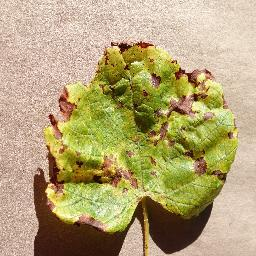

In [7]:
leafblight = list(data_dir.glob('LeafBlight/*'))
PIL.Image.open(str(leafblight[0]))


We will need the NumPy library, as one of the characteristics of the images we want are the dimensions of the images.


In [8]:
from PIL import Image

imagem = Image.open(str(leafblight[0]))

print(f"Modo da imagem: {imagem.mode}")

Modo da imagem: RGB


In [9]:
import numpy as np

Now, let's go through the image directory with the following command:

In [10]:
for subfolder in subfolders:
  path = data_dir / subfolder
  images = list(path.glob('*.JPG'))
  print(f'Class {subfolder} found {len(images)} images')

Class BlackRot found 400 images
Class BlackMeasles found 400 images
Class LeafBlight found 400 images
Class HealthyGrapes found 400 images


Now, we can see that we have 400 images inside each of the folders.

This is very interesting information, because our dataset for image classification is all balanced. We have 400 elements for each of the classes. But that's not the only information we want. We also want to know the size of the images within these folders.

In [11]:
for subfolder in subfolders:
  path = data_dir / subfolder
  images = list(path.glob('*.JPG'))
  print(f'Class {subfolder} found {len(images)} images')

  if images:
    img = PIL.Image.open(str(images[0]))
    img_array = np.array(img)
    print(f"Dimension '{subfolder}': {img_array.shape}")

Class BlackRot found 400 images
Dimension 'BlackRot': (256, 256, 3)
Class BlackMeasles found 400 images
Dimension 'BlackMeasles': (256, 256, 3)
Class LeafBlight found 400 images
Dimension 'LeafBlight': (256, 256, 3)
Class HealthyGrapes found 400 images
Dimension 'HealthyGrapes': (256, 256, 3)


Now, we see that in addition to the fact that there are 400 images in each of the folders, the first image always has dimensions 256, 256.3. The first two numbers, here 256 by 256, are the pixel dimensions of the images. The image is 256 pixels wide by 256 pixels tall. And the third number is the number of channels in the image.


The image is divided into 3 color channels, that is, it is as if it were a combination of 3 matrices.

In [12]:
import tensorflow as tf


Now we want to load the images, but we can't load them all at once. This is because we can exceed the amount of RAM available on our machine.

We will use passing, batch loading, or batches. So, let's set the batch_size to be equal to 64, for example. Now let's define other characteristics of the images, for example, the height, which will be equal to 256 and the width, which will be equal to 256.

In [13]:
batch_size = 64
img_height = 256
img_width = 256

In [14]:
train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 568,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


We have 1,600 images in total. We will use 1,280 images to train our neural network. The rest, we will use for validation, to validate our neural network. We will validate the neural network later with data that we did not see during training. To see if she generalized the problem effectively.

In [15]:
validation = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 568,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


Now, we see that we have 320 images out of these 1,600 being used for validation. By doing this training and validation division, we already have some of the information from our dataset.


In [16]:
train.class_names

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [17]:
validation.class_names

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [18]:
tf.random.set_seed(424242)

In [19]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input((256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [20]:
modelo.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

If we are going to train the neural network using the default Google Colab settings, this training can take a long time, mainly depending on the number of epochs in which we are going to run this training. So let's configure Google Colab to use a GPU.

Configuring a hardware accelerator
Let's click on “Edit > Notebook Settings” in the top menu and, in the modal, select the “GPU T4” option as hardware accelerator.

In [21]:
epochs = 10
history = modelo.fit(
    train,
    validation_data = validation,
    epochs = epochs
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 341s 17s/step - accuracy: 0.2723 - loss: 62.4799 - val_accuracy: 0.3625 - val_loss: 21.5152
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 211ms/step - accuracy: 0.4070 - loss: 13.6862 - val_accuracy: 0.2875 - val_loss: 7.4513
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.5006 - loss: 3.8462 - val_accuracy: 0.6094 - val_loss: 2.0582
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.7065 - loss: 1.2928 - val_accuracy: 0.6375 - val_loss: 1.2178
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.7502 - loss: 0.7215 - val_accuracy: 0.6531 - val_loss: 1.1173
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step - accuracy: 0.6998 - loss: 1.2720 - val_accuracy: 0.7063 - val_loss: 1.1447
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.6653 - loss: 1.4487 - val_accuracy: 0.5219 - val_loss: 2.6749
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.7294 - loss: 1.2004 - val_accuracy

In [22]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 196608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      25,165,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,499,406 (288.01 MB)

 Trainable params: 25,166,468 (96.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,332,938 (192.00 MB)

In [23]:
import matplotlib.pyplot as plt

In [24]:
def plot_results(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.figure(figsize = (12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, 'r', label = 'Training Accuracy')
  plt.plot(epochs_range, val_acc, 'b', label = 'Validation Accuracy')
  plt.legend(loc = 'lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, 'r', label = 'Training Loss')
  plt.plot(epochs_range, val_loss, 'b', label = 'Validation Loss')
  plt.legend(loc = 'upper right')
  plt.title('Training and Validation Loss')
  plt.show()

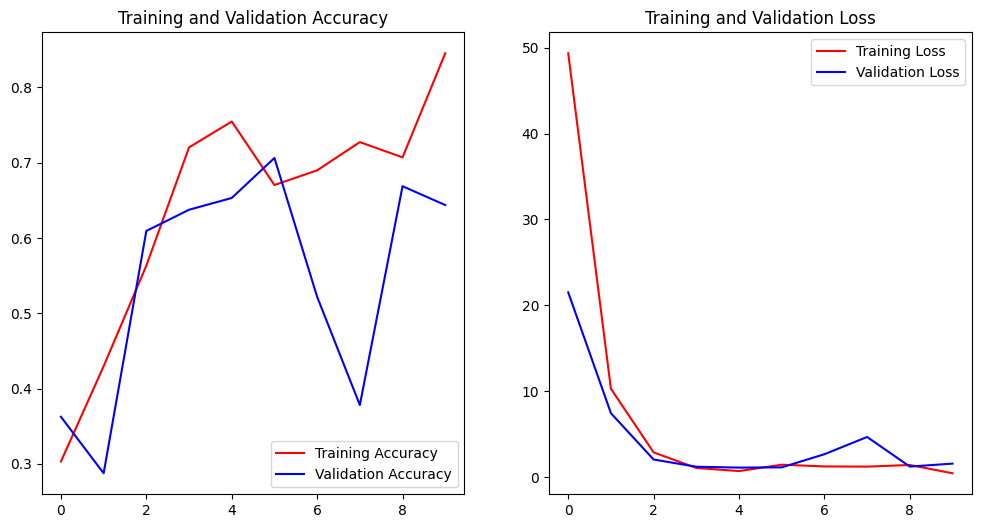

In [25]:
plot_results(history, epochs)

With this figure, we are comparing the training accuracy and the validation accuracy. In both cases, accuracy and loss, both the training and validation results evolve in a similar way, which is great!

Conclusion
We can see that we are reaching the maximum accuracy around 0.8, which would represent an accuracy of almost 80%, which is something interesting. But, can't we do better?

Our idea from now on will be to work with other layers and more advanced techniques involving neural networks, which will enable better accuracy values.

In [26]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input((256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [27]:
modelo.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [28]:
epochs = 10
history = modelo.fit(
    train,
    validation_data = validation,
    epochs = epochs
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.2827 - loss: 5.5423 - val_accuracy: 0.2594 - val_loss: 1.3647
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.3578 - loss: 1.2479 - val_accuracy: 0.7000 - val_loss: 0.6830
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - accuracy: 0.7741 - loss: 0.5798 - val_accuracy: 0.8625 - val_loss: 0.3380
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.9195 - loss: 0.2284 - val_accuracy: 0.9250 - val_loss: 0.2045
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step - accuracy: 0.9702 - loss: 0.1089 - val_accuracy: 0.9250 - val_loss: 0.1988
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - accuracy: 0.9914 - loss: 0.0516 - val_accuracy: 0.9250 - val_loss: 0.1876
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.9944 - loss: 0.0248 - val_accuracy: 0.9125 - val_loss: 0.2793
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step - accuracy: 0.9581 - loss: 0.1215 - val_accuracy:

In [29]:
def plot_results(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.figure(figsize = (12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, 'r', label = 'Training Accuracy')
  plt.plot(epochs_range, val_acc, 'b', label = 'Validation Accuracy')
  plt.legend(loc = 'lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, 'r', label = 'Training Loss')
  plt.plot(epochs_range, val_loss, 'b', label = 'Validation Loss')
  plt.legend(loc = 'upper right')
  plt.title('Training and Validation Loss')
  plt.show()

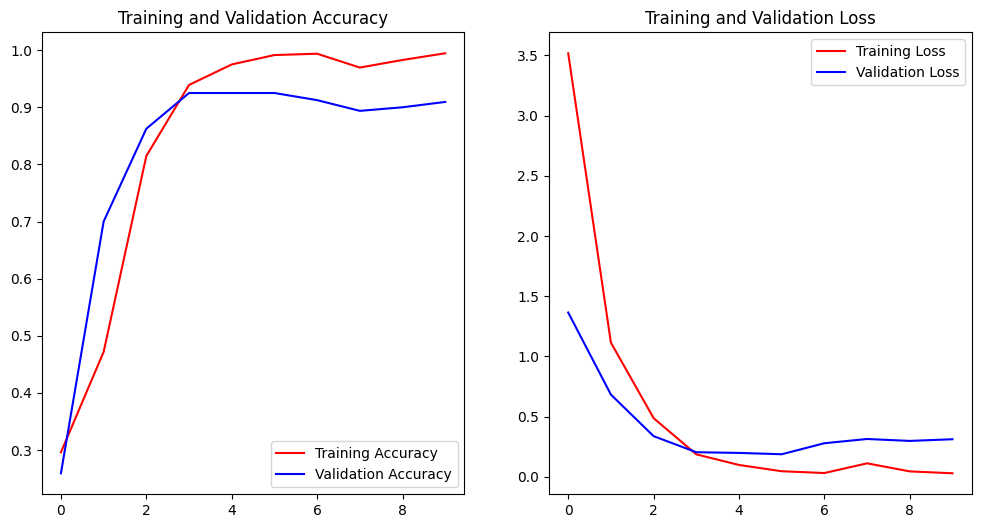

In [30]:
plot_results(history, epochs)

Analyzing the graphs

Apparently, we had a good hit rate once again, that is, good accuracy. Accuracy, both for training and validation, increases over time, and the same occurs for loss values ​​over time in relation to training and validation.

However, we identified that, in the case of the training data in the graph on the left, the accuracy reaches a value of 1.0. We can confirm this in the return from the previous cell, where there is information that, for the last epoch, the accuracy actually reached the value 1.0 (accuracy: 1.0000).

In the case of training data, when the network reaches very high values, we start to have a performance that is not even that interesting in the validation data.

In other words, we can cause the network to fit too much to the training data, and, in the case of data not seen during training, it does not work as well. So it doesn't generalize the problem as well, although it works better now than without the convolutional layers.

In [31]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('accuracy') > 0.93:
      print('\nReached 93% accuracy so cancelling training!')
      self.model.stop_training = True

callbacks = myCallback()

In [33]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input((256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

modelo.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [34]:
epochs = 10
history = modelo.fit(
    train,
    validation_data = validation,
    epochs = epochs,
    callbacks = [callbacks]
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.2549 - loss: 4.8819 - val_accuracy: 0.5250 - val_loss: 1.0897
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.6587 - loss: 0.8552 - val_accuracy: 0.8438 - val_loss: 0.3953
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 0.8163 - loss: 0.4480 - val_accuracy: 0.8250 - val_loss: 0.4059
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 285ms/step - accuracy: 0.9103 - loss: 0.2587 - val_accuracy: 0.9250 - val_loss: 0.2180
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9542 - loss: 0.1394
Reached 93% accuracy so cancelling training!
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - accuracy: 0.9545 - loss: 0.1390 - val_accuracy: 0.8813 - val_loss: 0.2740
